# Clustering Algorithms

Here we use an artificial (toy) data set provided by sklearn. The data set is generated by "make_moons" in Sklearn, producing two interleaving half circles. We use this data set, and show how the different clustering algorithms (K-mean, Agglomerative, DBSCAN) work on it. Note that Agglomerative & DBSCAN do not predict clusters for new data points, they have a .fit_predict method that works on the existing data. 

We plot the actual moons and the output of each clustering algorithm, each in separate figure.
Assuming that we have the actual labels, we get the adjusted_rand_score for each clustering algorithm. We use this score just for illustration here.  The score of 1 means perfect clustering and 0 means bad cliustering. In  real-world unsupervised learning sceranrios, the actual labels are not known. Clustering algorithms are generally analyzed manually by a domain expert.

Note: If you wish to draw dendrogram of hierarchical clustering, you can use the scipy package instead:
(from scipy.cluster.hierarchy import dendrogram, linkage)

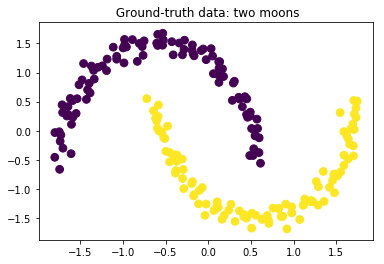

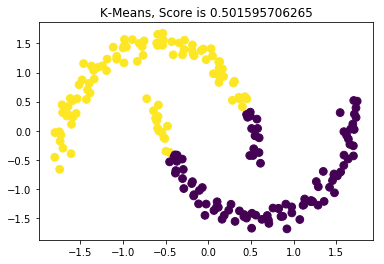

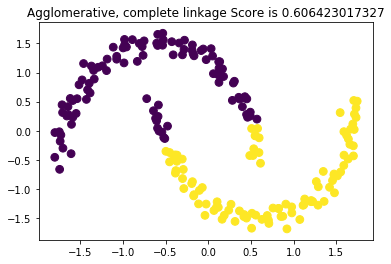

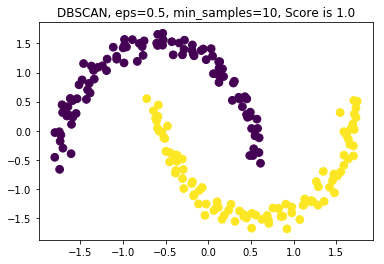

In [15]:
% matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score


#create the toy data set (two moons)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# Scale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Plot the data using different colors for the two moons
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=60)
plt.title(" Ground-truth data: two moons")
plt.show()


#############################
# Use K-Means Clustering (k=2)
##############################
clusters_kmeans = KMeans(n_clusters=2).fit_predict(X_scaled)

score_Kmeans=adjusted_rand_score(clusters_kmeans,y)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_kmeans, s=60)
plt.title("K-Means, Score is %s" %score_Kmeans )
plt.show()


##############################################
# Use Hierarchical (Agglomerative) Clustering
##############################################
#Use two clusters and complete linkage 
clusters_Agglomerative = AgglomerativeClustering(n_clusters=2, 
                            linkage='complete').fit_predict(X_scaled)

#score assuming we know the label 
score_Agglomerative=adjusted_rand_score(clusters_Agglomerative,y) 

#plot Hierarchical Clustering 
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_Agglomerative, s=60)
plt.title("Agglomerative, complete linkage Score is %s" %score_Agglomerative )
plt.show()



##########################
# Use DBSCAN Clustering
##########################

clusters_DBSCAN = DBSCAN(eps=0.5, min_samples=10).fit_predict(X_scaled)

score_DBSCAN=adjusted_rand_score(clusters_DBSCAN,y) #score assuming we know the actual label 
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_DBSCAN, s=60)
plt.title("DBSCAN, eps=0.5, min_samples=10, Score is %s" %score_DBSCAN )
plt.show()


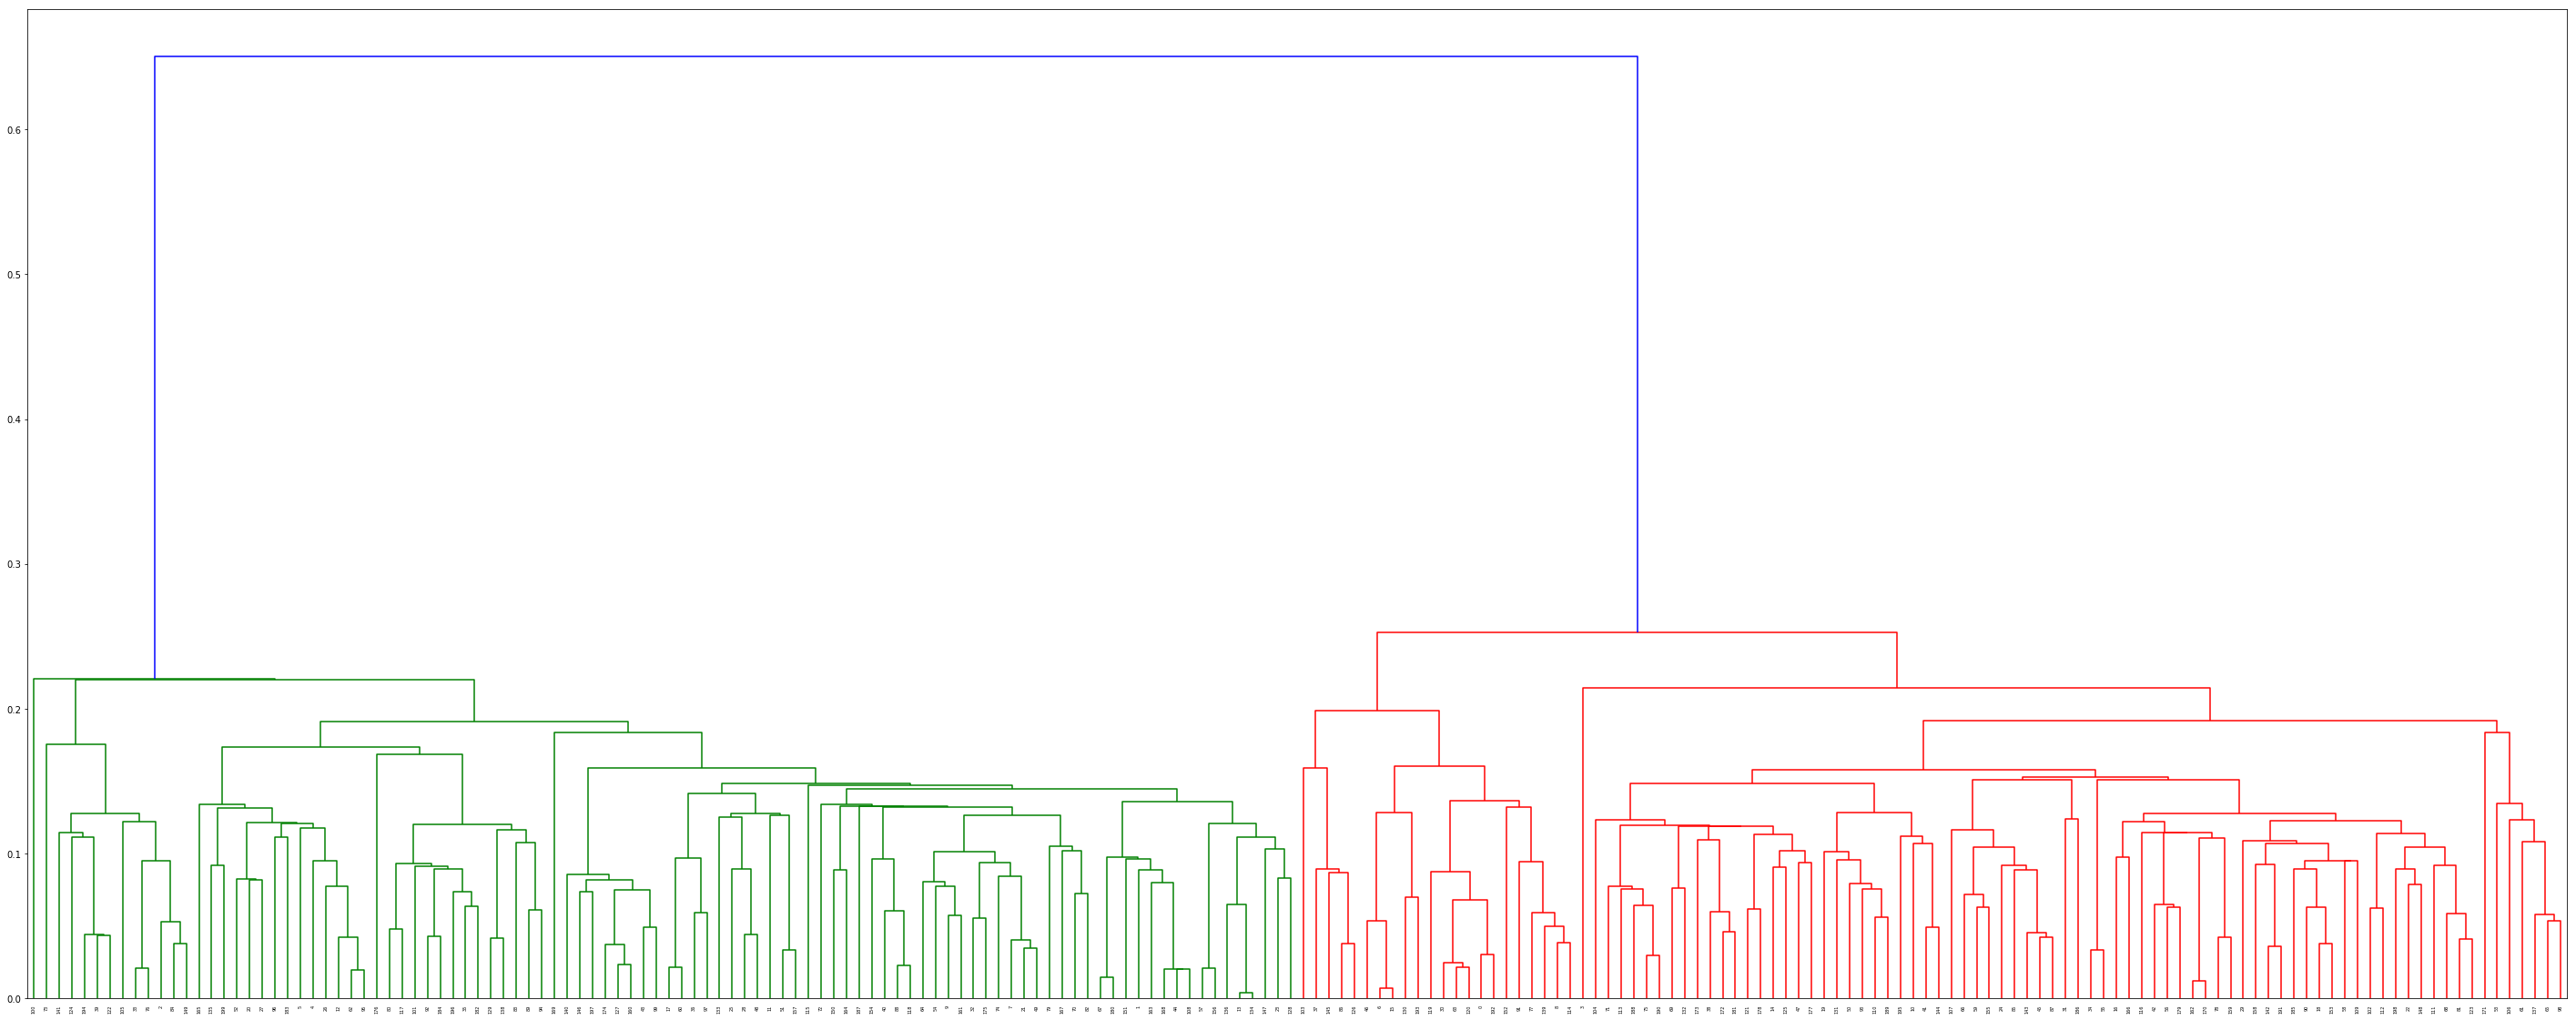

In [13]:
#if we want to plot dendrogram using single linkage 
clusters_Agglomerative_Scipi=hierarchy.linkage(X_scaled, 'single')
plt.figure(figsize=(50,20))
dn = hierarchy.dendrogram(clusters_Agglomerative_Scipi)